# 💉​💊​ Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique


## Les critères cliniques tels que : 
- glycémie (Glucose)
- la pression artérielle (Blood Pressure)
- l’épaisseur du pli cutané (Skin Thickness)
- l’insuline (Insulin)
- l’Indice de Masse Corporelle (BMI)
- la fonction de prédisposition génétique au diabète (Diabetes Pedigree Function) 
- l’âge (Age).

## ​✅​ Objective
* Entraîner et déployer un modèle d’intelligence artificielle capable de classer les patients selon leur risque de diabète 
* Regrouper (clustering) les données brutes afin d’identifier des profils ou comportements similaires au sein de la population étudiée.



# 📚​ Bibliothèques

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt                # Pour tracer les graphiques
from sklearn.cluster import KMeans             # Pour appliquer l'algorithme K-Means
from kneed import KneeLocator                  # Pour détecter automatiquement le "coude" (elbow) de la courbe


#  1️⃣ Etape 1: Chargement des données

In [291]:
# Importer les données à l’aide de pandas. Vérifier le type et la structure des colonnes (df.info() et df.head()).
df = pd.read_csv('dataset.csv')
#Affichage de 5 premier ligne
df.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [292]:
#Analyser les types de colonnes et dimensions 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [293]:
# le nombre de collonne et des ligne 
print(f'la data contiene {df.shape[1]} Collone et {df.shape[0]} ligne')

la data contiene 9 Collone et 768 ligne


## ⭐Conclusion :
Ce dataset contient 768 entrées complètes (sans valeurs manquantes) avec des types numériques (int et float), idéales pour l'analyse et la modélisation.

In [294]:

# identifier les doublons .
doublons = df.duplicated().sum()

# la suupression des doublons
df.drop_duplicates()
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63
764,764,2,122,70,27,0,36.8,0.340,27
765,765,5,121,72,23,112,26.2,0.245,30
766,766,1,126,60,0,0,30.1,0.349,47


## les graph : Histogrammes, boxplots ,pairplots

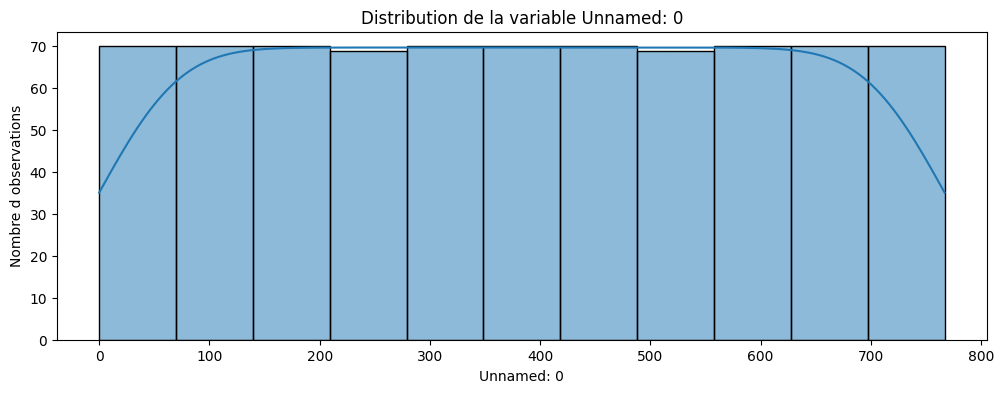

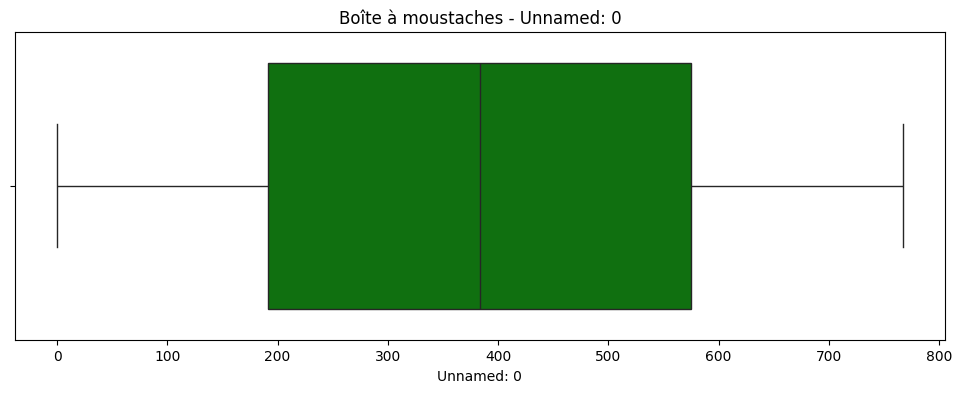

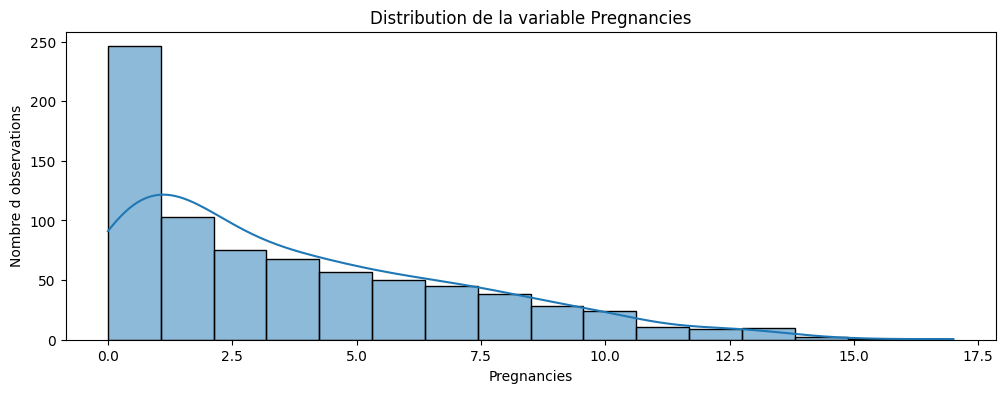

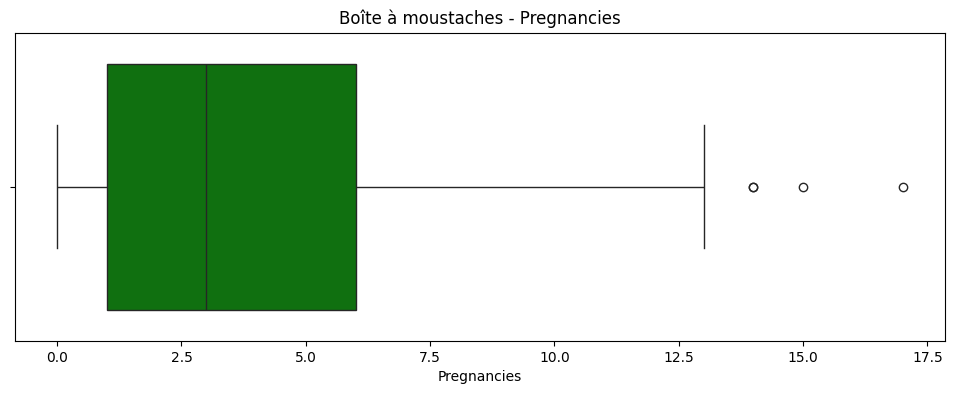

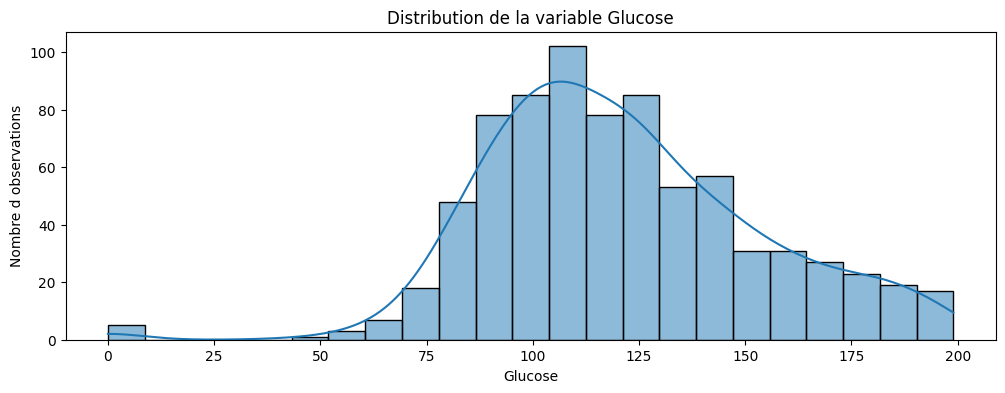

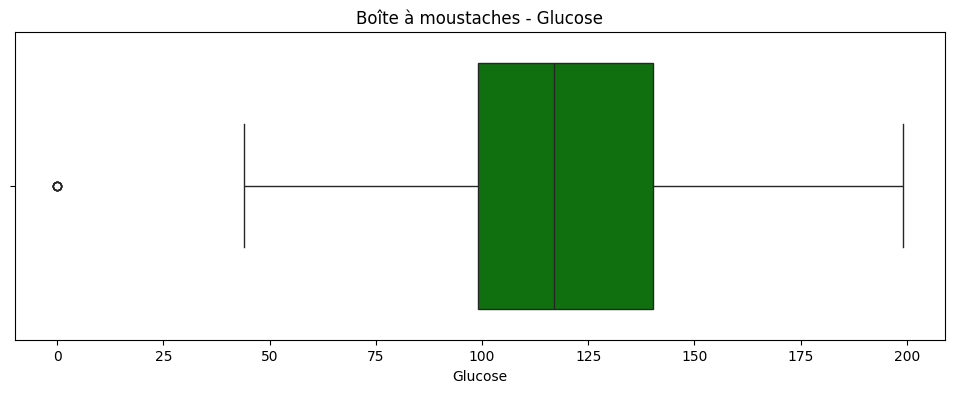

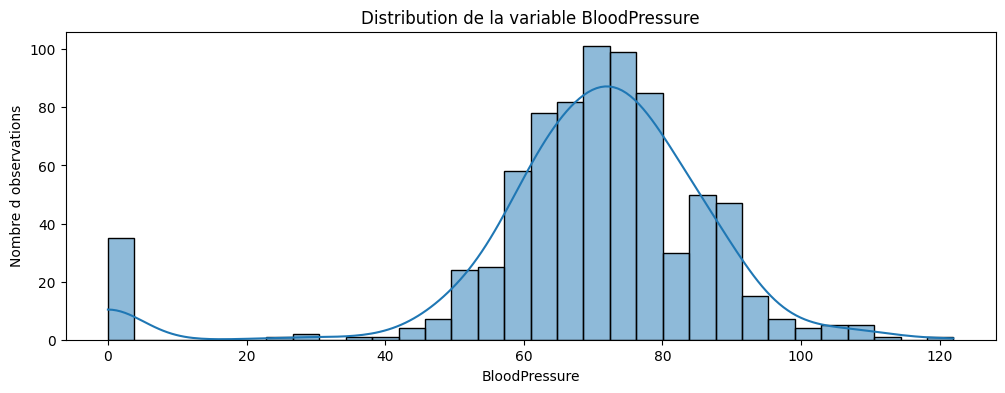

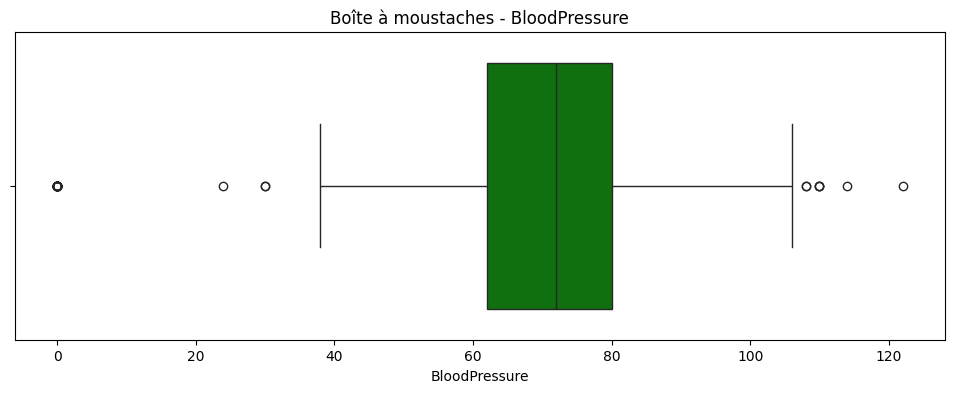

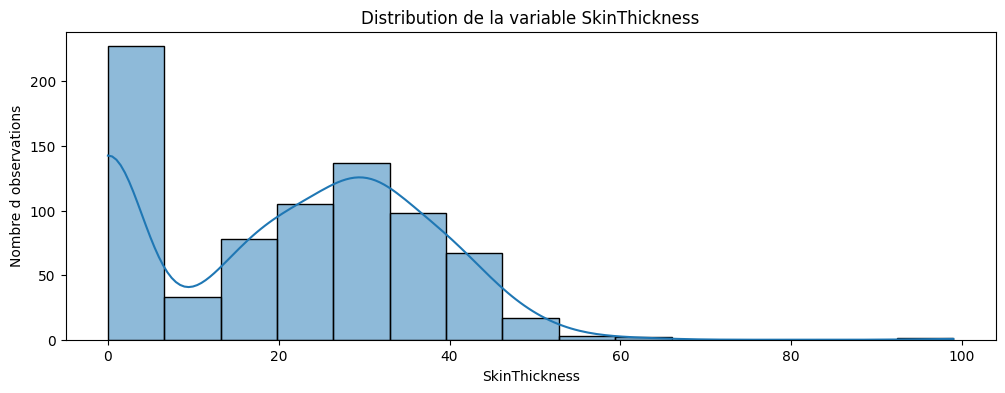

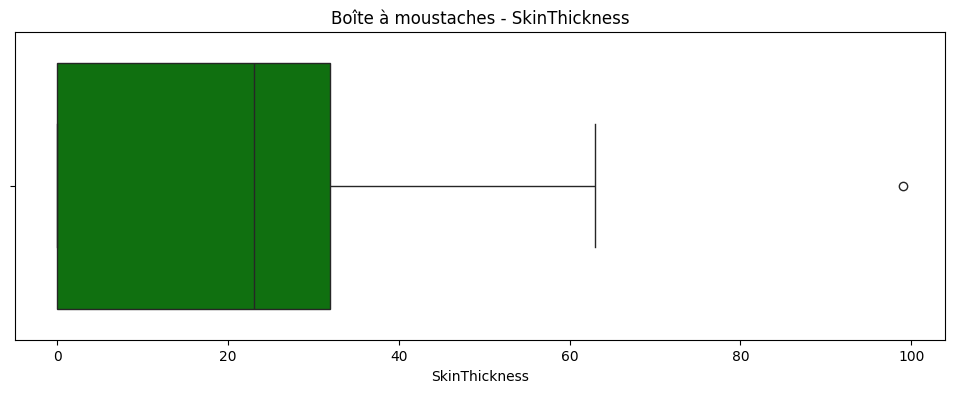

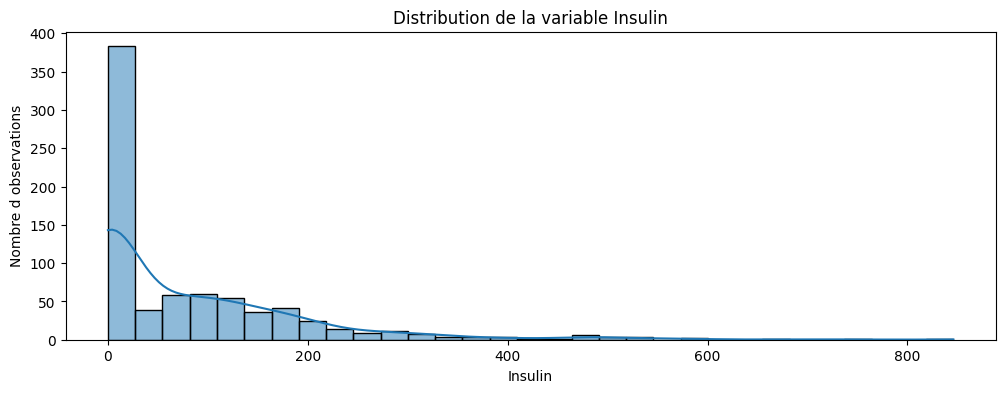

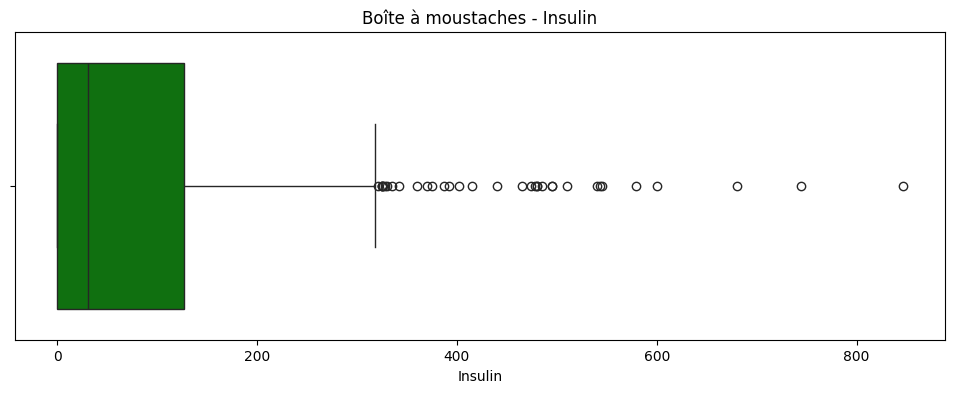

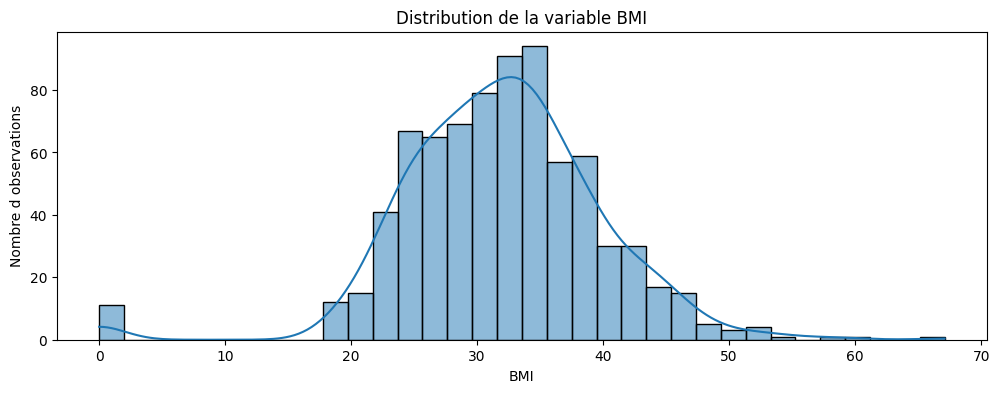

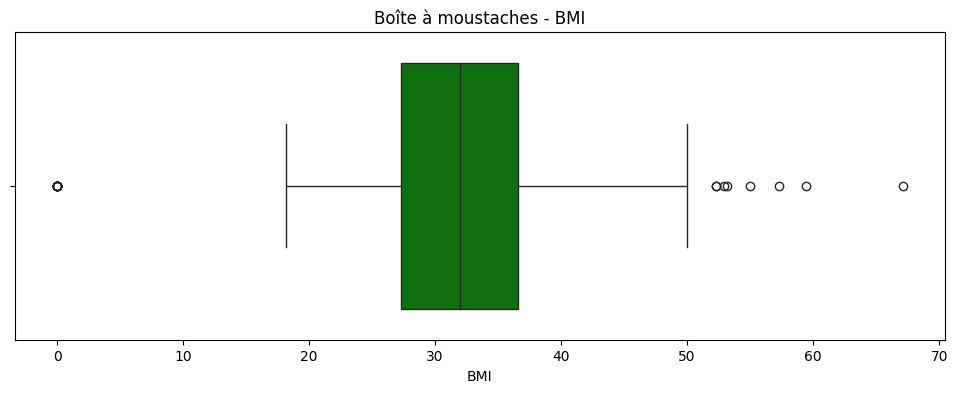

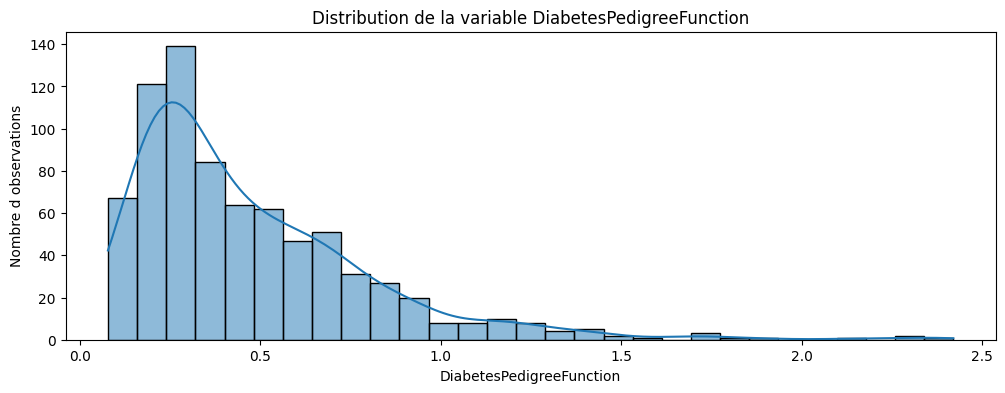

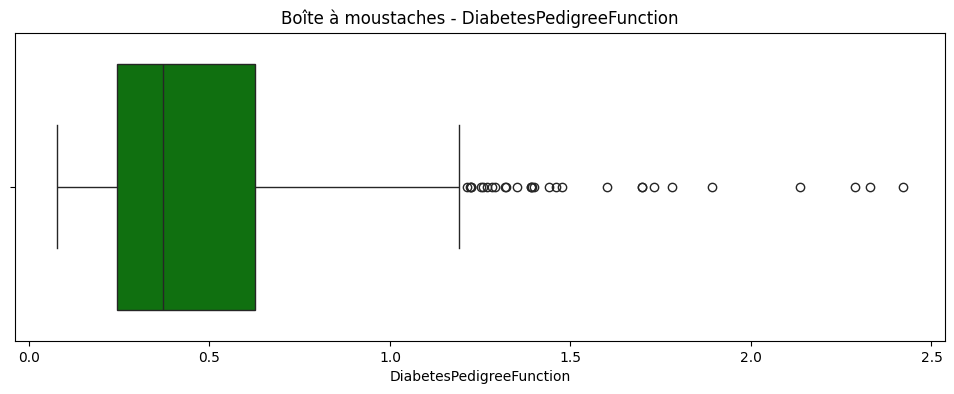

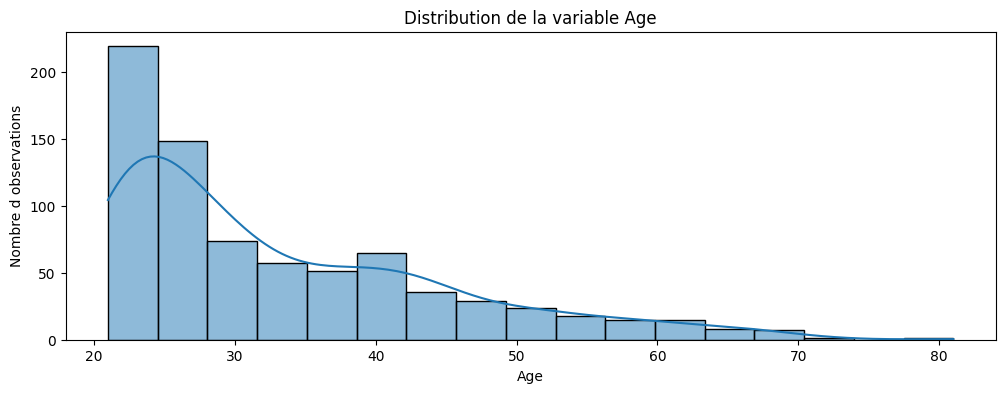

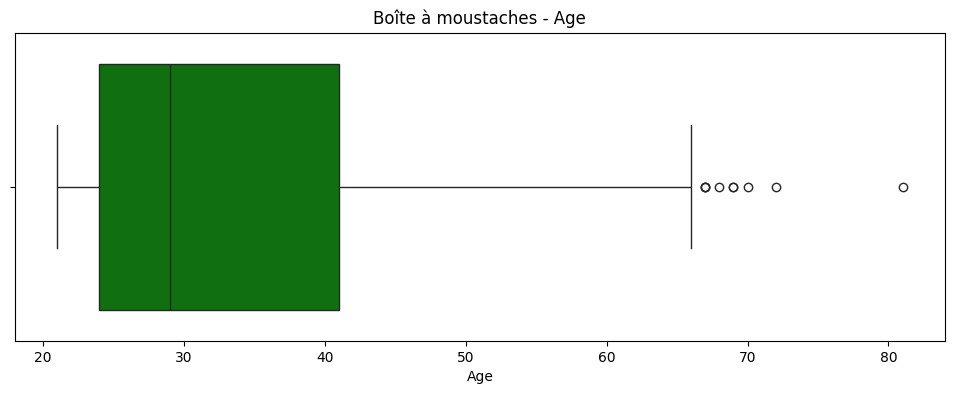

In [295]:
#Histogrammes, boxplots(seaborn, matplotlib)
for data in df:
    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    #trace Boxplots
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[data], color='green')
    plt.title(f'Boîte à moustaches - {data}')

    

<Figure size 1200x800 with 0 Axes>

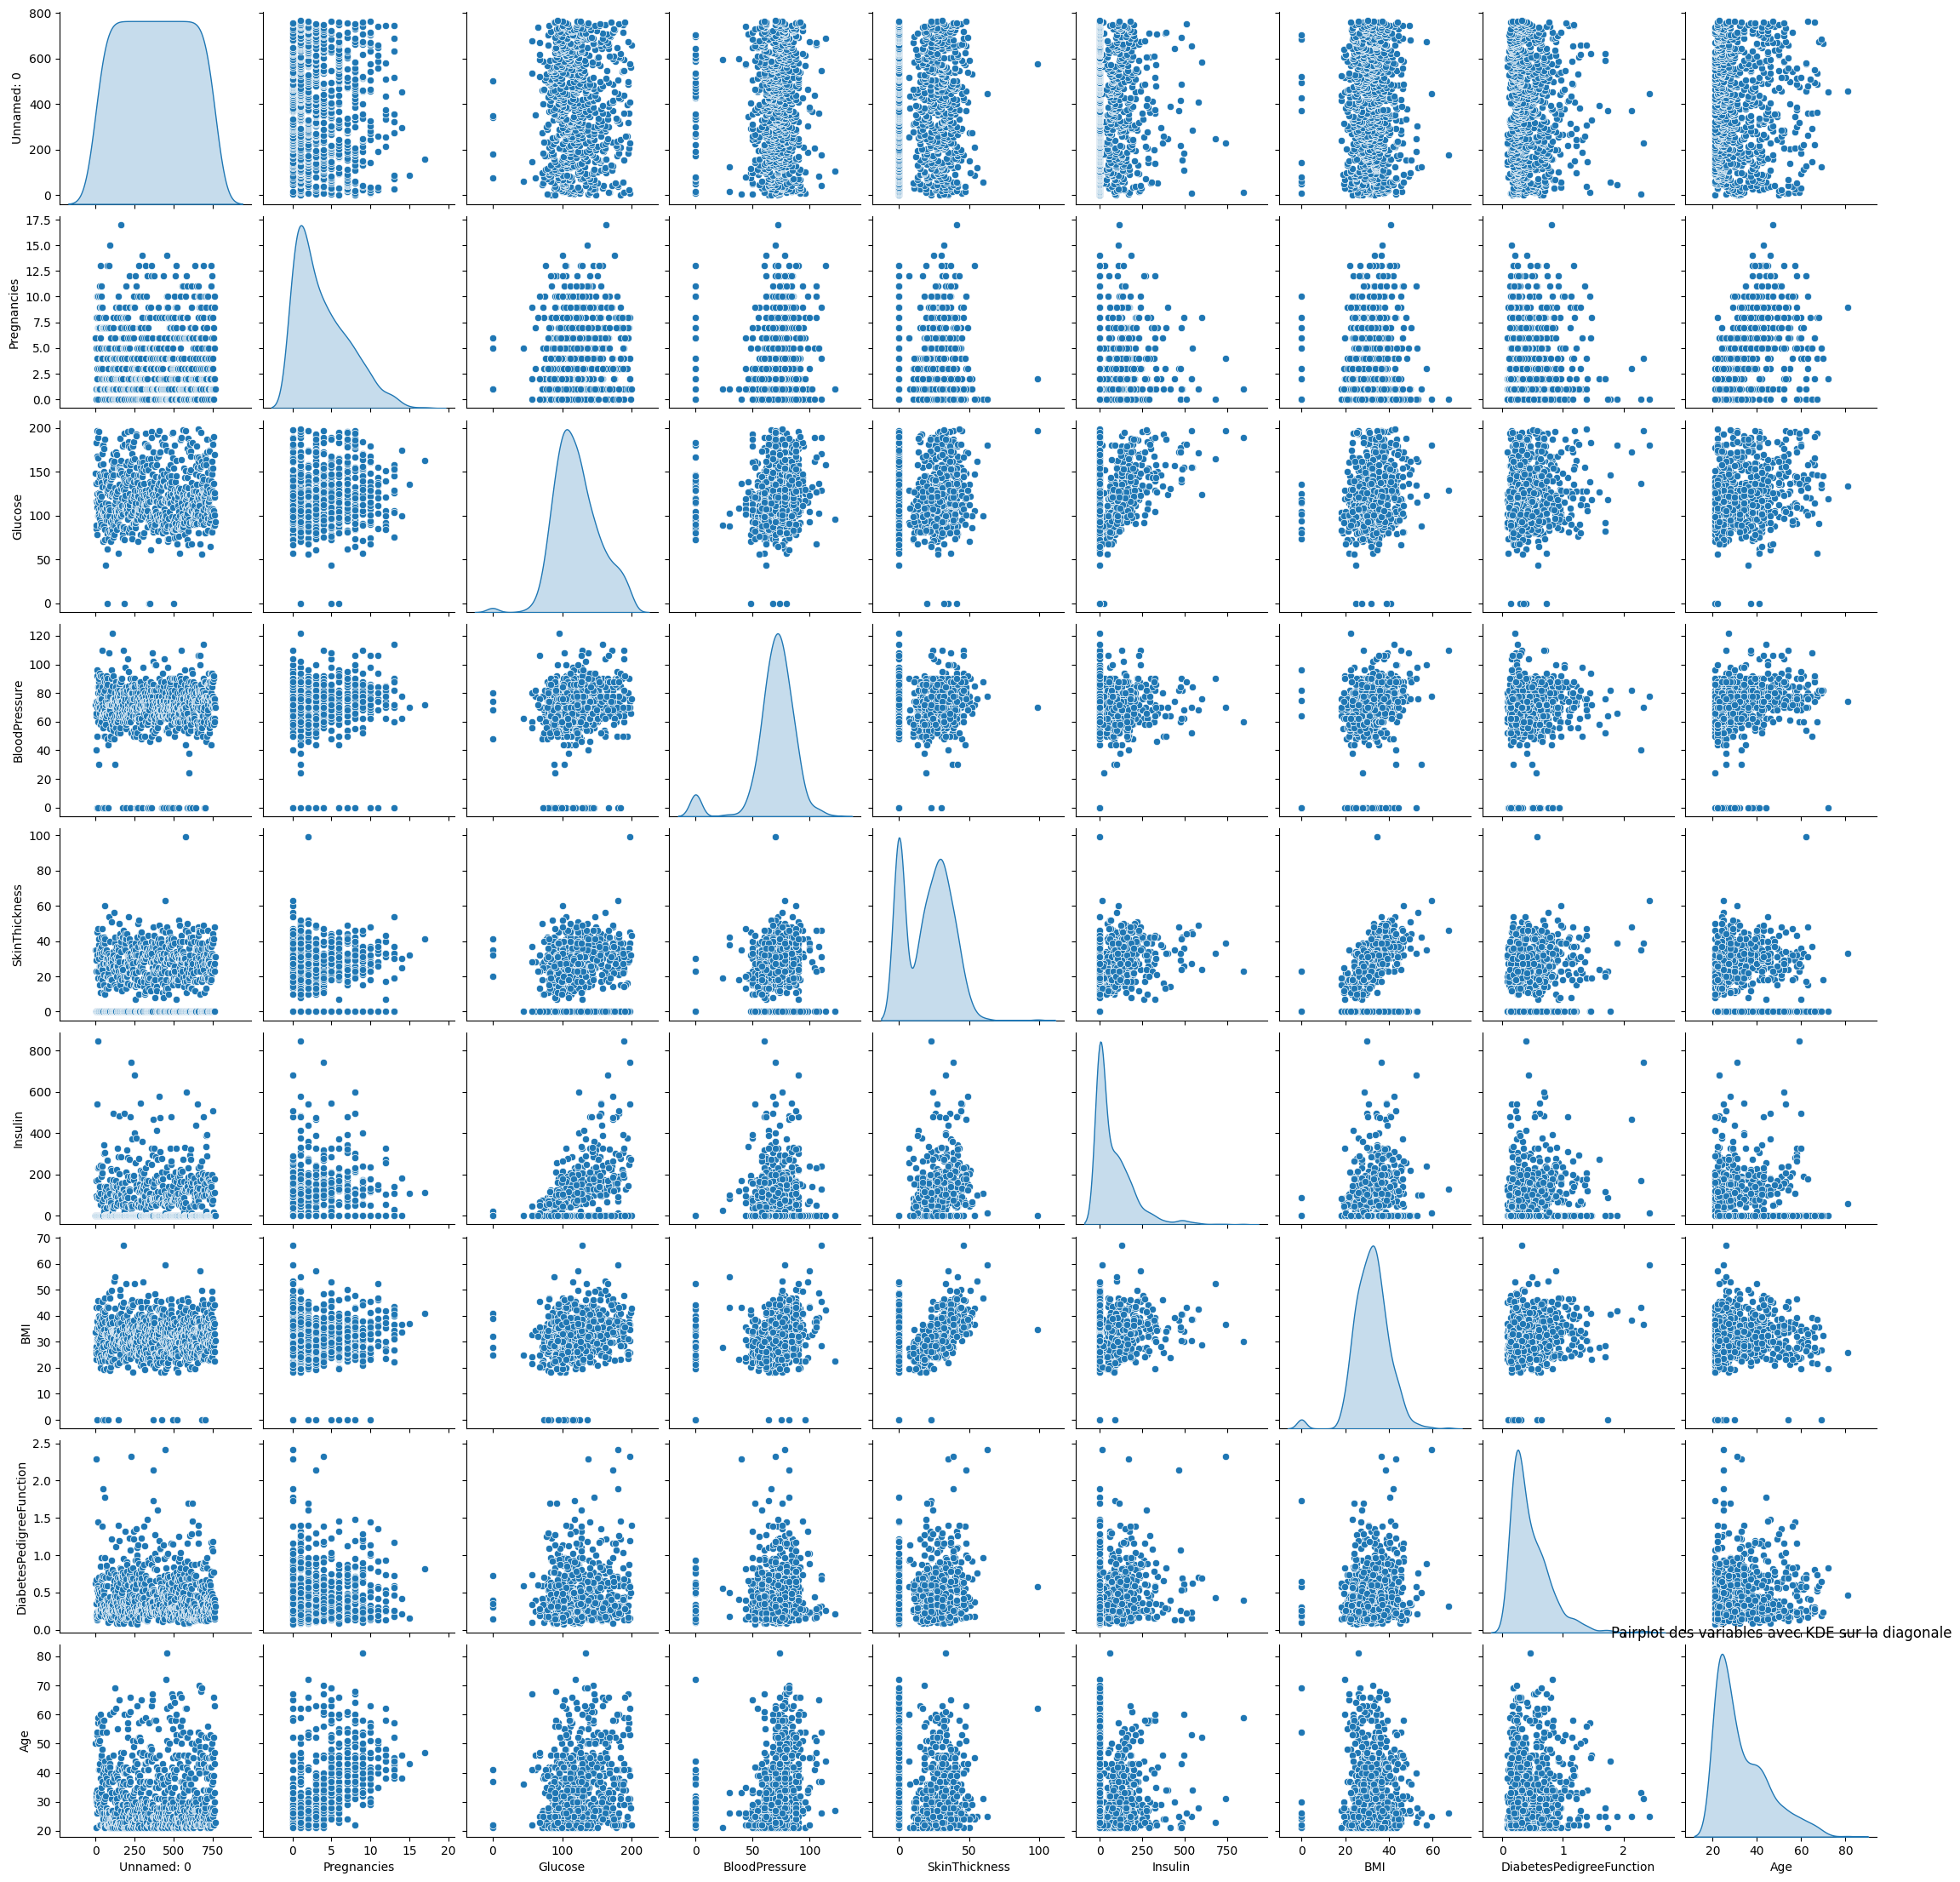

In [296]:
# Pairplots
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde')
plt.title('Pairplot des variables avec KDE sur la diagonale')
plt.show()

## Matrice de corrélation 

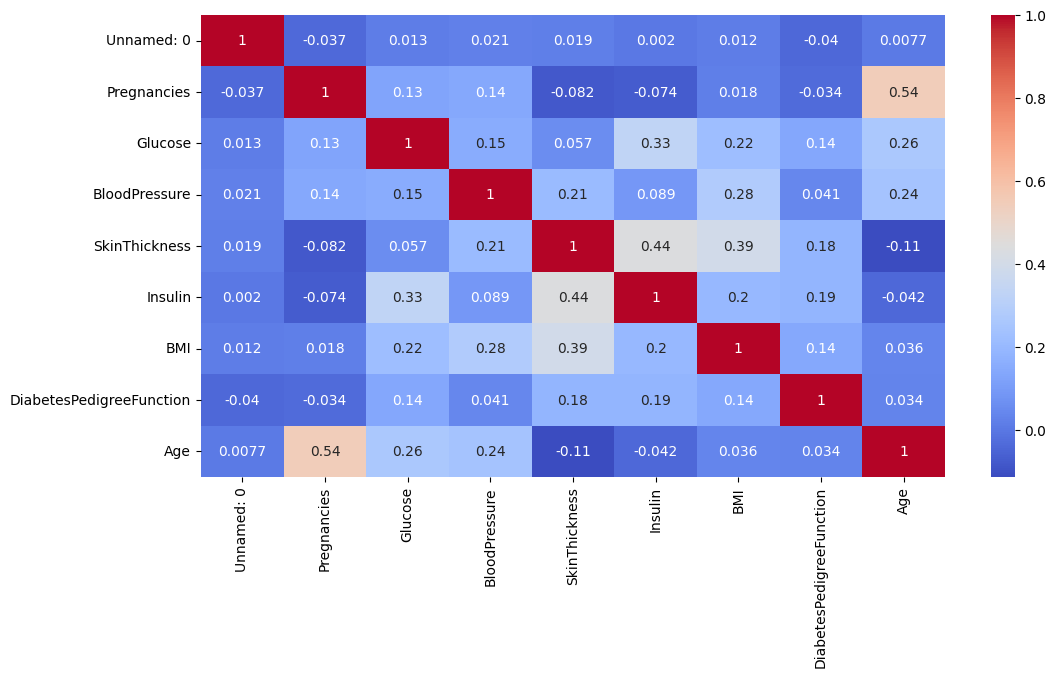

In [297]:
#Matrice de corrélation (sns.heatmap())
#les valeur entre -1 et 1
corr_matrix = df.corr()

# Visualisation : heatmap de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Identifier les colonnes avec valeurs nulles

In [298]:
print('les colonnes avec les values manquantes sont :')
print(df.isnull().sum())

les colonnes avec les values manquantes sont :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Appliquer une stratégie d’imputation (moyenne/médiane ou suppression)

In [299]:
print('pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes')

pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes


Détection des doublons

In [300]:
print("\nNombre de doublons :")
print(df.duplicated().sum())


Nombre de doublons :
0


# Visualisation des outliers (IQR)

In [301]:
# Détection des valeurs extrêmes pour la colonne 'price'
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    borne_min = q1 - 1.5 * iqr
    borne_max = q3 + 1.5 * iqr
    outliers = df[(df[col] < borne_min) | (df[col] > borne_max)]
    print(f"Colonne : {col}, Nombre d'outliers : {len(outliers)}")

Colonne : Unnamed: 0, Nombre d'outliers : 0
Colonne : Pregnancies, Nombre d'outliers : 4
Colonne : Glucose, Nombre d'outliers : 5
Colonne : BloodPressure, Nombre d'outliers : 45
Colonne : SkinThickness, Nombre d'outliers : 1
Colonne : Insulin, Nombre d'outliers : 34
Colonne : BMI, Nombre d'outliers : 19
Colonne : DiabetesPedigreeFunction, Nombre d'outliers : 29
Colonne : Age, Nombre d'outliers : 9


Supprimer les outliers

In [302]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:  
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    print(f'Outliers supprimés pour {col}')

Outliers supprimés pour Pregnancies
Outliers supprimés pour Glucose
Outliers supprimés pour BloodPressure
Outliers supprimés pour SkinThickness
Outliers supprimés pour Insulin
Outliers supprimés pour BMI
Outliers supprimés pour DiabetesPedigreeFunction
Outliers supprimés pour Age


# Les graphe apres la supression des outliers 

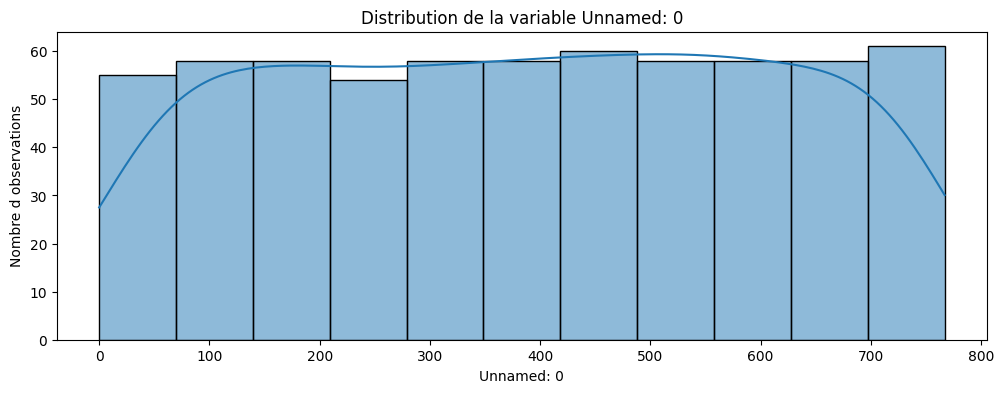

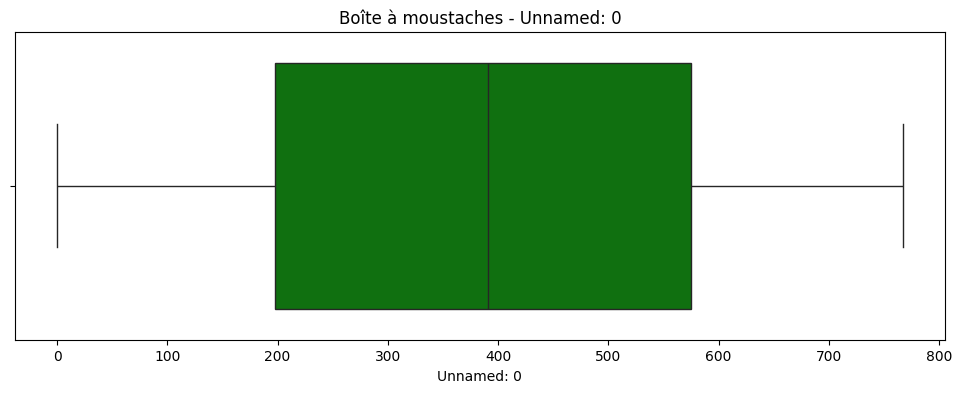

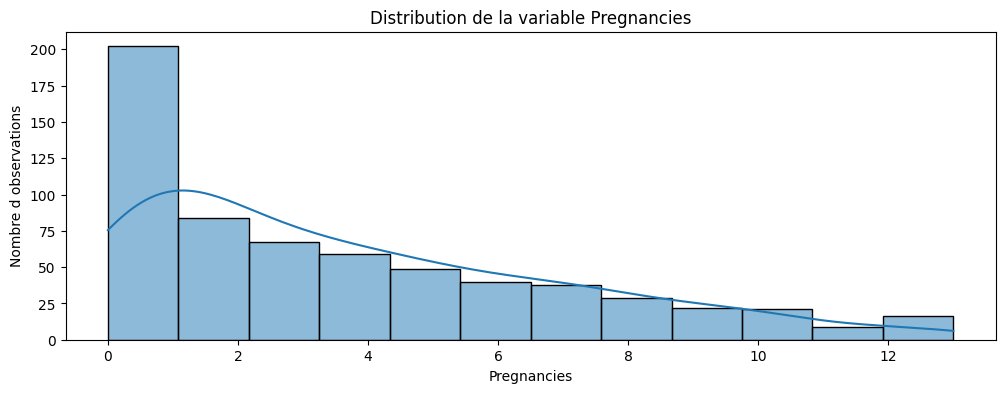

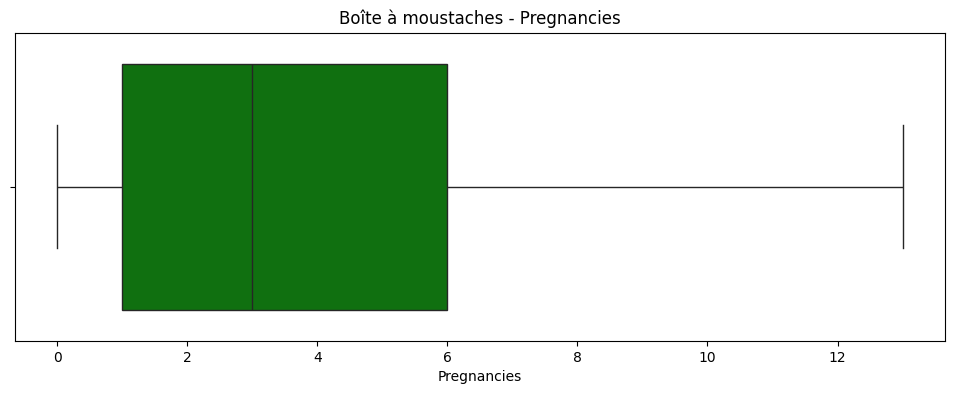

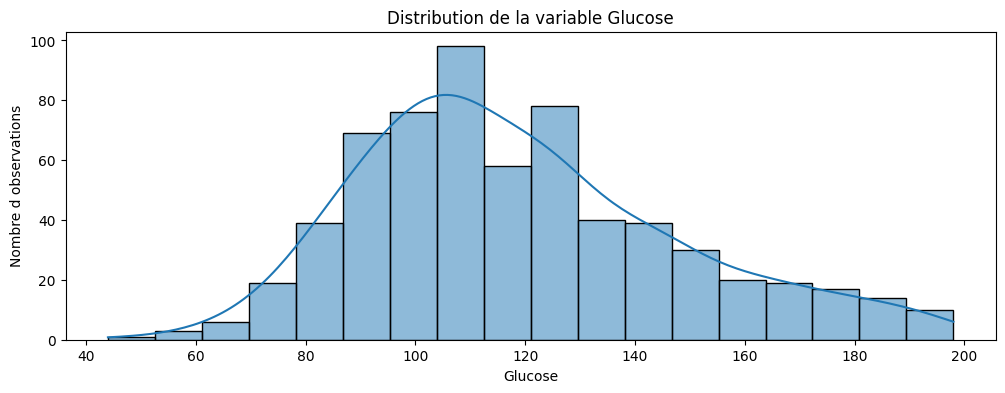

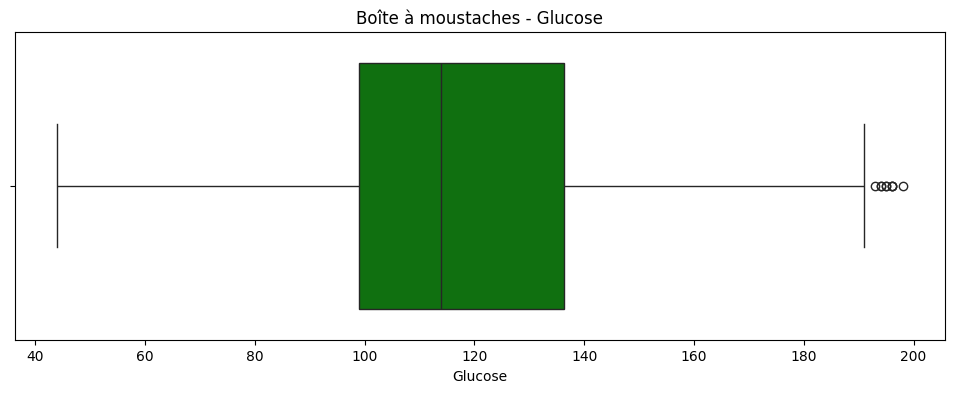

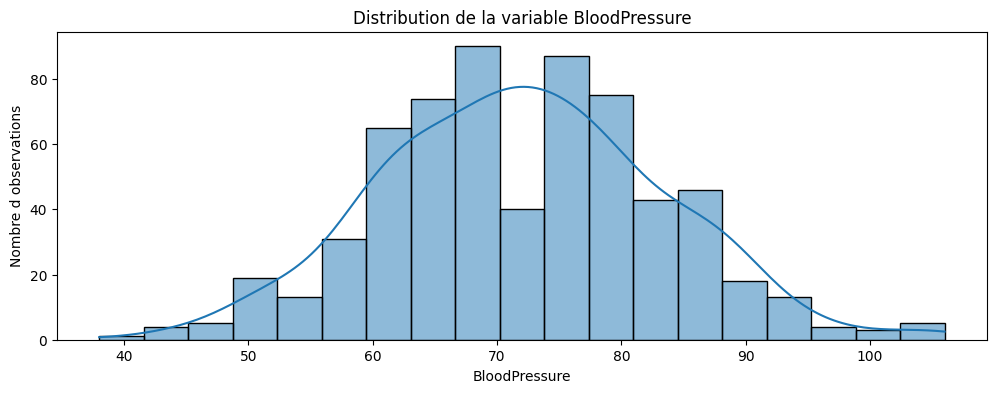

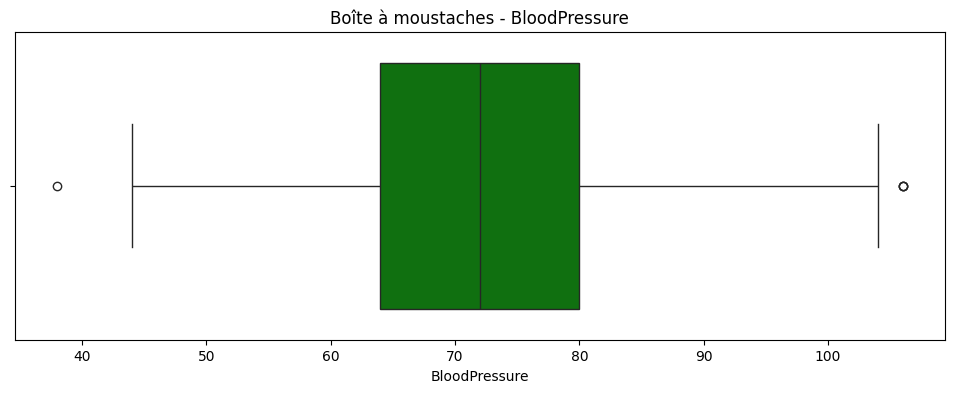

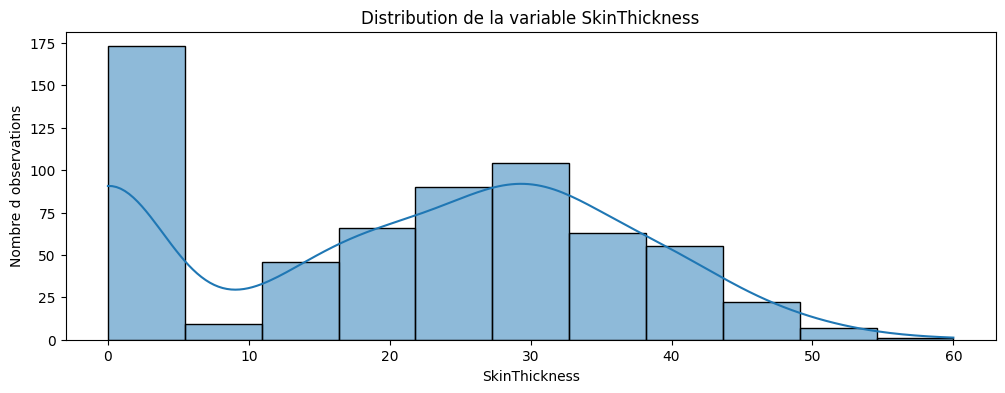

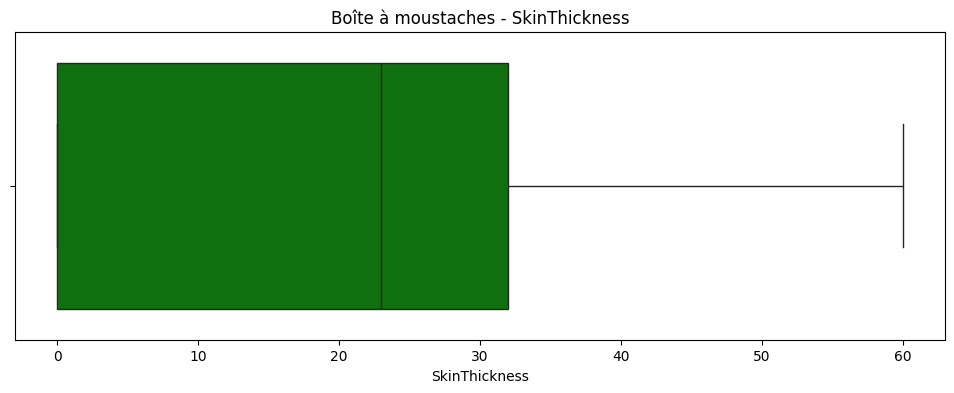

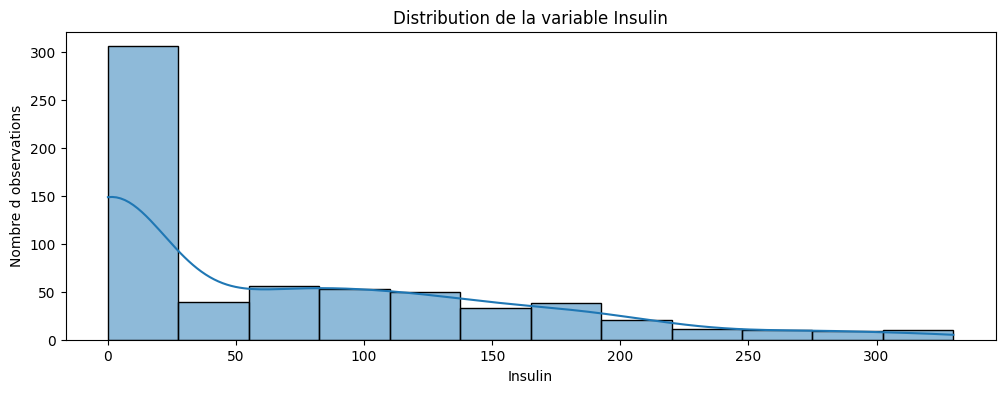

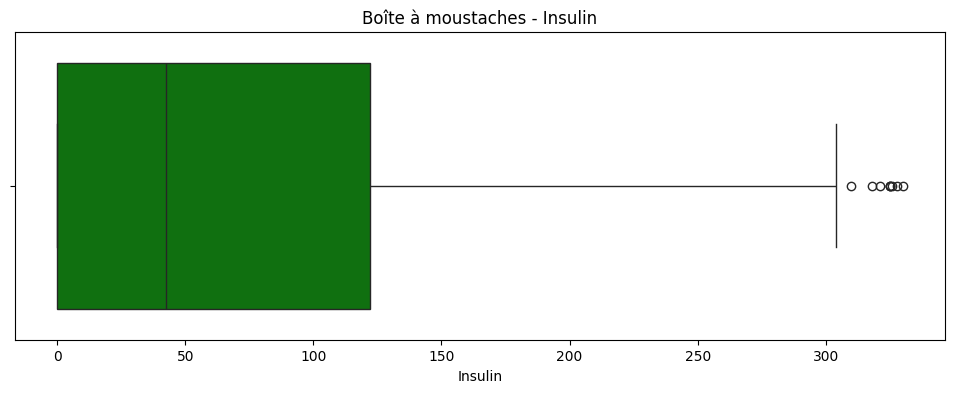

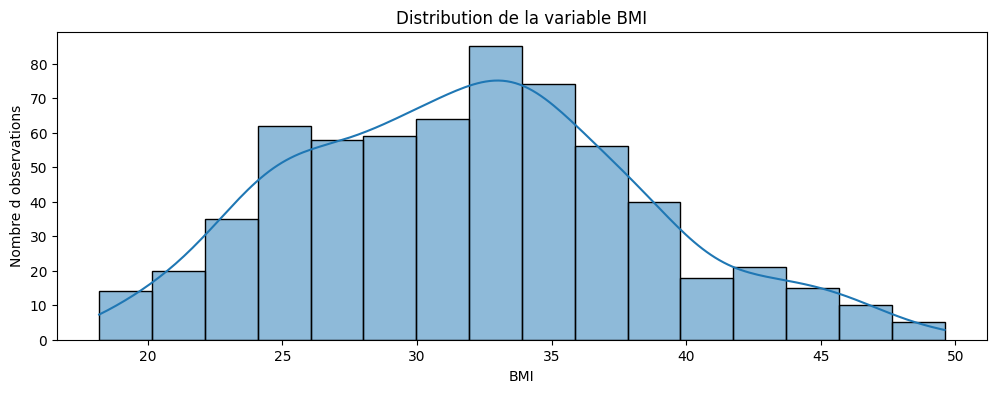

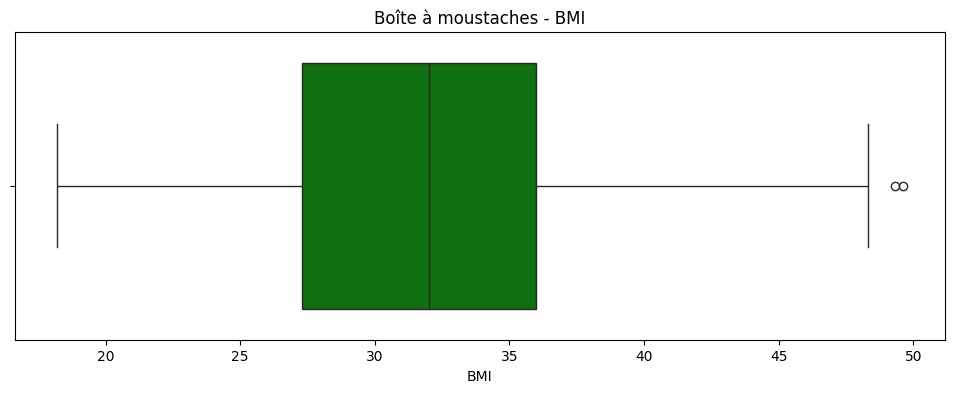

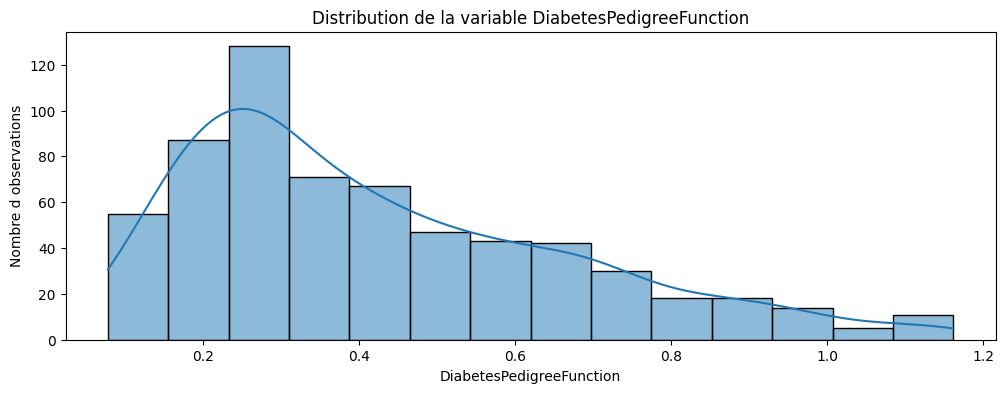

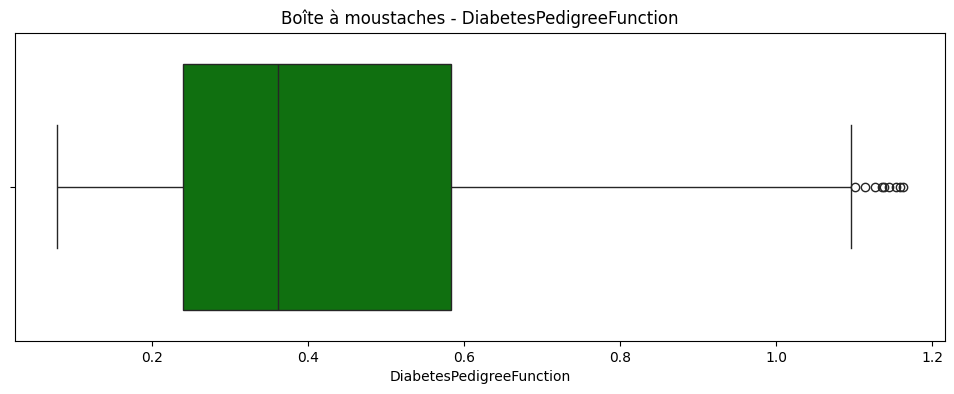

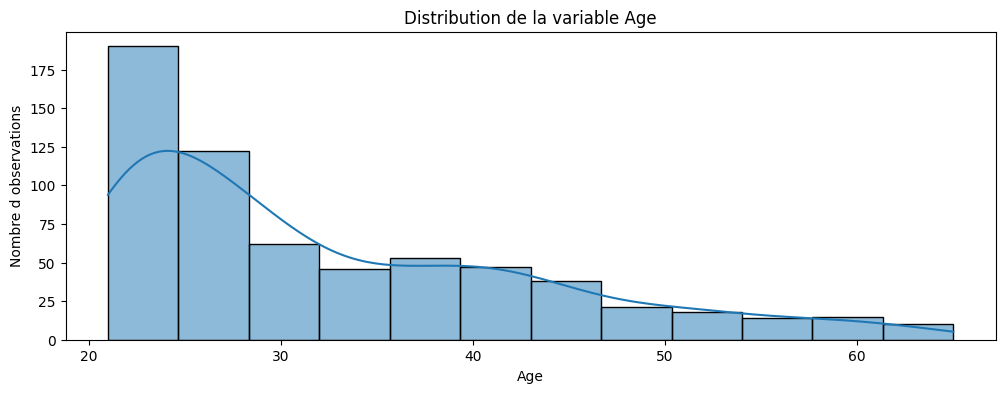

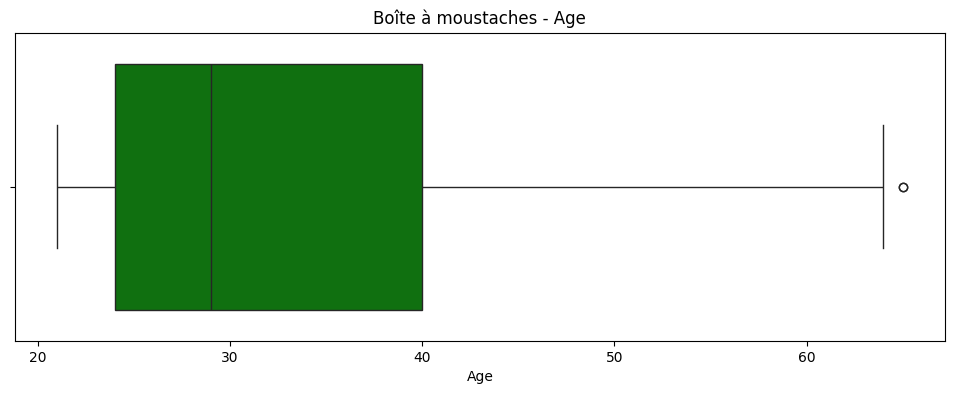

In [303]:
#Histogrammes, boxplots(seaborn, matplotlib)
for data in df:
    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    #trace Boxplots
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[data], color='green')
    plt.title(f'Boîte à moustaches - {data}')

    

# Visualiser les relations entre les variables pertinant 
- Les variables pertinentes : Glucose, BMI, Age, DiabetesPedigreeFunction.

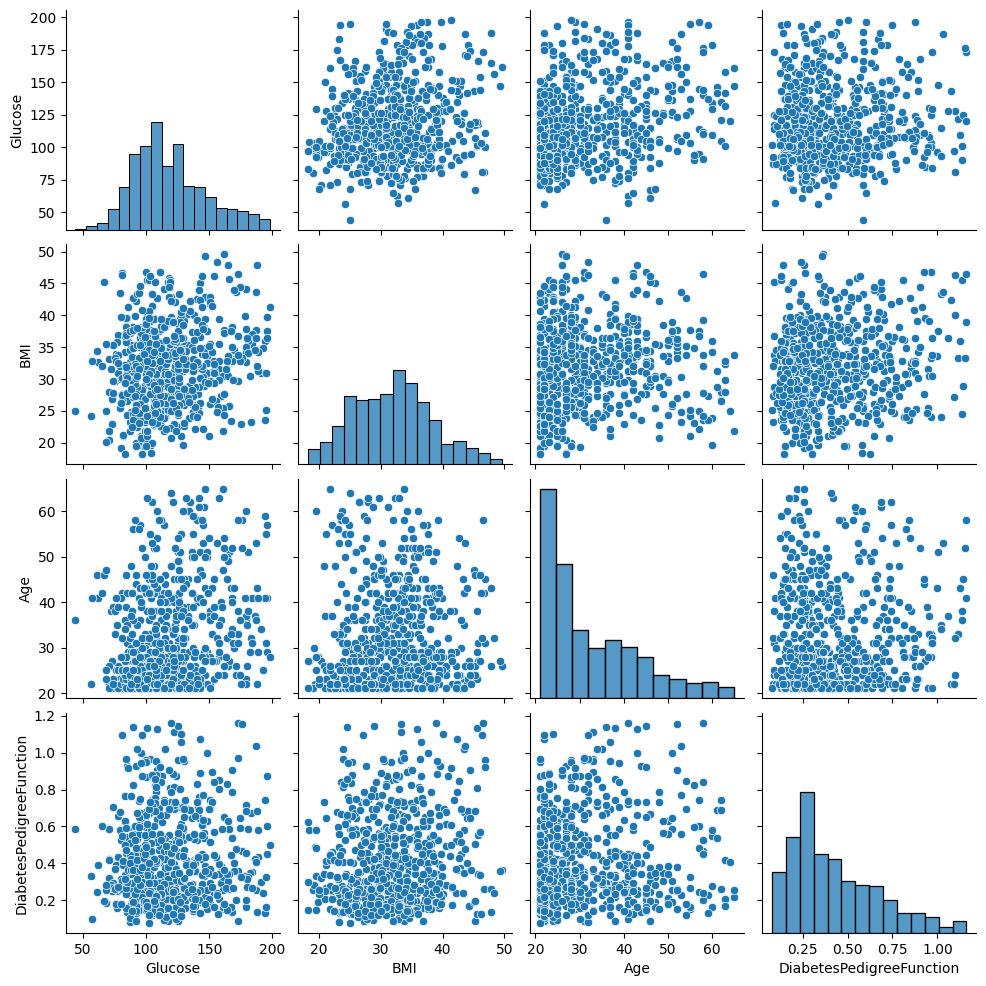

In [304]:

variable_pertine = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
#pairplot
sns.pairplot(df[variable_pertine])
plt.show()



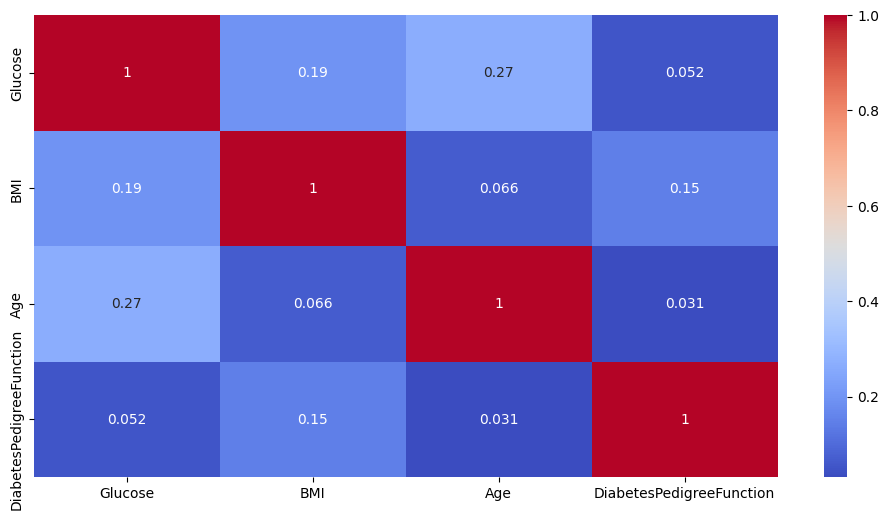

In [305]:
#Avec Matrice de corélation
corr_matrix = df[variable_pertine].corr()

# Visualisation : heatmap de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 📈​ La standarisation via StandardScaler 

#### 🧠 Qu’est-ce que la standardisation ?
- La standardisation est une transformation mathématique qui modifie les données pour qu’elles aient :
- une moyenne (mean) de 0
- un écart-type (standard deviation) de 1
- Elle est aussi appelée centrage-réduction.

#### 🎯 À quoi ça sert concrètement ?
- Mettre toutes les variables sur la même échelle
- Améliorer la performance de certains algorithmes
- Faciliter la convergence 

In [306]:
# Appliquer une technique de standardisation (ex. : StandardScaler) pour homogénéiser les échelles des variables numériques.

X = df[variable_pertine]

# Création du scaler
scaler = StandardScaler()

#fit() : calcule la moyenne et l’écart-type sur les données
#transform() : applique la transformation
#fit_transform() = fait les deux à la fois

X_scaled = scaler.fit_transform(X)
# Optionnel : convertir en DataFrame pour garder les noms des colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=variable_pertine)


# Afficher les premières lignes
print(X_scaled_df.head())


    Glucose       BMI       Age  DiabetesPedigreeFunction
0  1.005403  0.256438  1.604688                  0.819791
1 -1.168963 -0.840893 -0.143041                 -0.307223
2  2.213384 -1.358207 -0.051055                  1.003543
3 -1.030908 -0.605751 -1.062898                 -1.058566
4 -0.099037 -0.997655 -0.235026                 -0.919731


# Entraînement des modèles de clustering
* Partie 1: Clustering avec K-Means:

### Qu'est-ce que le Clustering ?

Le clustering est une technique d'apprentissage non supervisé qui regroupe des données similaires en clusters,

* le nombre optimal de clusters (Méthode du coude)

In [307]:

inertias = []                                  # Liste pour stocker les valeurs d'inertie (SSE) pour chaque k
k_range = range(1, 11)                         # Plage des valeurs de k à tester (de 1 à 10)

# Boucle pour tester différents nombres de clusters k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialiser le modèle KMeans avec k clusters
    kmeans.fit(X_scaled)                            # Apprendre à partir des données standardisées
    inertias.append(kmeans.inertia_)                # Sauvegarder l'inertie (somme des distances intra-cluster)


* Tracage de la courbe

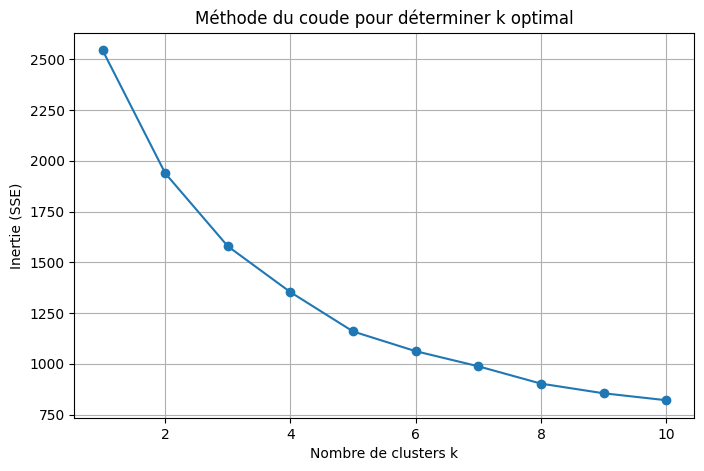

In [308]:
#Visualiser la courbe d’inertie pour appuyer le choix de k

plt.figure(figsize=(8,5))                           # Définir la taille de la figure
plt.plot(k_range, inertias, marker='o')             # Tracer la courbe inertie vs. k avec des marqueurs
plt.title("Méthode du coude pour déterminer k optimal")  # Titre du graphique
plt.xlabel("Nombre de clusters k")                  # Étiquette de l'axe X
plt.ylabel("Inertie (SSE)")                         # Étiquette de l'axe Y
plt.grid(True)                                      # Afficher une grille pour faciliter la lecture
plt.show()                                          # Afficher le graphique

* Trouver automatiquement le coude

In [309]:
# Trouver automatiquement le coude (valeur optimale de k)
kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')  
# KneeLocator analyse la courbe pour détecter le "coude" où l'inertie diminue moins vite
print(f"Nombre optimal de clusters : {kl.elbow}")  

Nombre optimal de clusters : 5


* Entraîner un modèle K-Means avec le nombre de clusters choisi. cest 5

In [310]:
# Appliquer KMeans avec le nombre optimal de clusters trouvé
k_optimal = kl.elbow # Récupérer la valeur optimale de k

kmeans = KMeans(n_clusters=k_optimal, random_state=42)  



* Ajouter une colonne Cluster au dataset indiquant le groupe assigné à chaque individu.

In [311]:
df['Cluster'] = kmeans.fit_predict(X_scaled)

* Visualiser la répartition des observations par cluster et interpréter les résultats.

*  Graphe (Glucose - BMI )

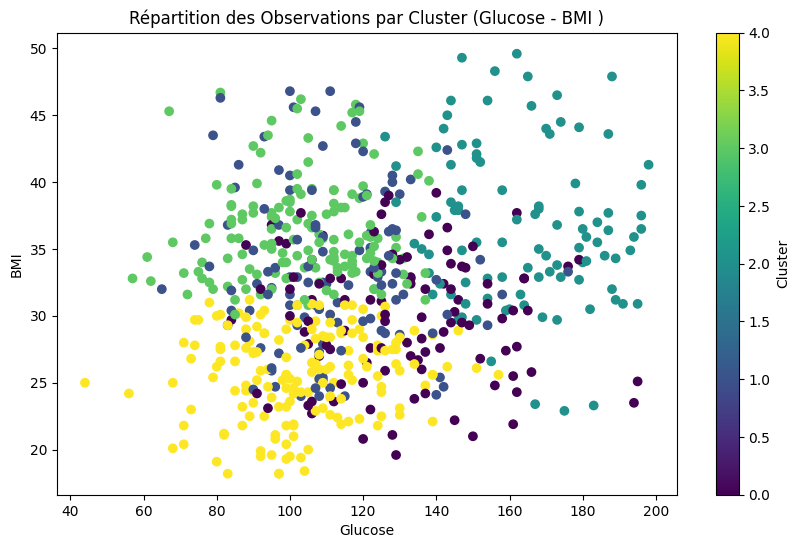

In [312]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['BMI'] , c=df['Cluster'], cmap='viridis')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Répartition des Observations par Cluster (Glucose - BMI )')
plt.colorbar(label='Cluster')
plt.show()



* Graphique 2: Age vs Glucose  

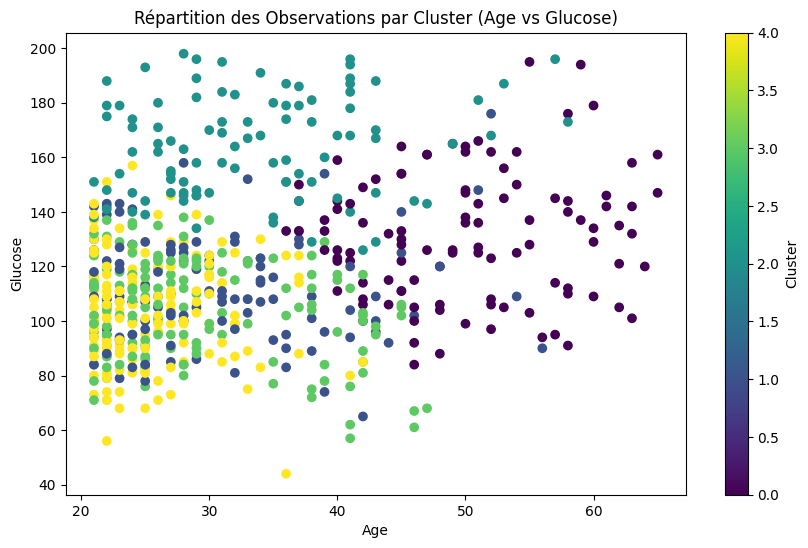

In [313]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Glucose'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Répartition des Observations par Cluster (Age vs Glucose)')
plt.colorbar(label='Cluster')
plt.show()

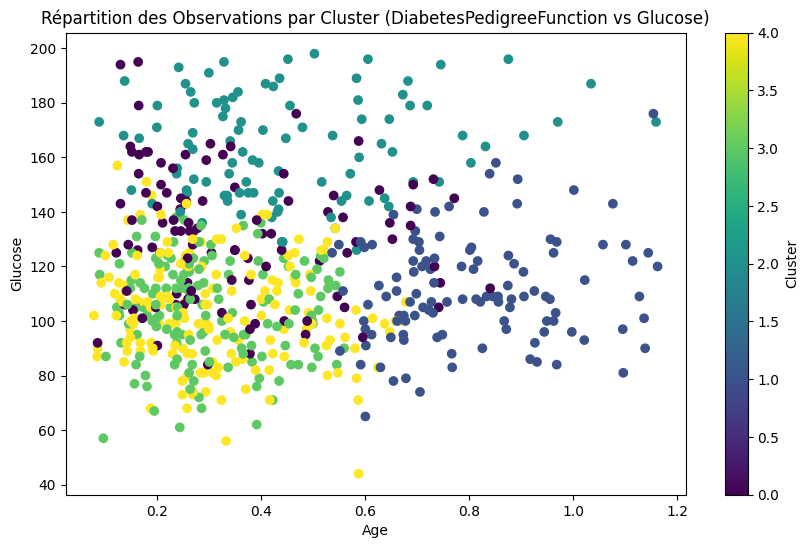

In [314]:

plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Glucose'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Répartition des Observations par Cluster (DiabetesPedigreeFunction vs Glucose)')
plt.colorbar(label='Cluster')
plt.show()


* Interprétation des résultat 

In [315]:
# INTERPRÉTATION SIMPLE
print("\n=== INTERPRÉTATION ===")
for cluster in range(k_optimal):
    data_cluster = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster + 1} ({len(data_cluster)} personnes):")
    print(f"  Glucose moyen: {data_cluster['Glucose'].mean():.2f}")
    print(f"  BMI moyen: {data_cluster['BMI'].mean():.2f}")
    print(f"  Age moyen: {data_cluster['Age'].mean():.2f}")
    print(f"  DiabetesPedigreeFunction moyen: {data_cluster['DiabetesPedigreeFunction'].mean():.2f}")

k_optimal


=== INTERPRÉTATION ===

Cluster 1 (105 personnes):
  Glucose moyen: 131.14
  BMI moyen: 29.88
  Age moyen: 50.07
  DiabetesPedigreeFunction moyen: 0.35

Cluster 2 (114 personnes):
  Glucose moyen: 111.50
  BMI moyen: 33.54
  Age moyen: 30.80
  DiabetesPedigreeFunction moyen: 0.81

Cluster 3 (98 personnes):
  Glucose moyen: 163.94
  BMI moyen: 36.72
  Age moyen: 33.39
  DiabetesPedigreeFunction moyen: 0.45

Cluster 4 (149 personnes):
  Glucose moyen: 103.90
  BMI moyen: 36.29
  Age moyen: 29.28
  DiabetesPedigreeFunction moyen: 0.30

Cluster 5 (170 personnes):
  Glucose moyen: 103.37
  BMI moyen: 25.66
  Age moyen: 25.31
  DiabetesPedigreeFunction moyen: 0.32


np.int64(5)